In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/KurapikaZoldyck/KurapikaZoldyck/main/%23%20-%20Data/user_ratings.csv')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [3]:
data.shape

(100836, 6)

In [4]:
data['title'].nunique()

9719

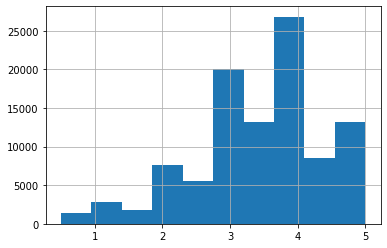

In [5]:
data['rating'].hist()

In [6]:
count = data['title'].value_counts()
_ = list(count[count > 200].index)
_

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jurassic Park (1993)',
 'Braveheart (1995)',
 'Terminator 2: Judgment Day (1991)',
 "Schindler's List (1993)",
 'Fight Club (1999)',
 'Toy Story (1995)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Usual Suspects, The (1995)',
 'American Beauty (1999)',
 'Seven (a.k.a. Se7en) (1995)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Apollo 13 (1995)']

In [7]:
_2 = data[data['title'].isin(_)]
_2

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
26933,606,589,3.5,1171325855,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26934,607,589,4.0,963078960,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26935,608,589,3.0,1117415154,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26936,609,589,3.0,847220990,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [8]:
_3 = round(_2[['title','rating']].groupby('title').mean(),2)
_3.sort_values('rating',ascending=False,inplace=True)
_3

,rating
title,
"Shawshank Redemption, The (1994)",4.43
Fight Club (1999),4.27
"Usual Suspects, The (1995)",4.24
Star Wars: Episode IV - A New Hope (1977),4.23
Star Wars: Episode V - The Empire Strikes Back (1980),4.22
Schindler's List (1993),4.22
Pulp Fiction (1994),4.20
"Matrix, The (1999)",4.19
"Silence of the Lambs, The (1991)",4.16


In [9]:
data['userId'].nunique()

610

In [10]:
data[data['userId']==1]

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
16056,1,3744,4.0,964980694,Shaft (2000),Action|Crime|Thriller
16075,1,3793,5.0,964981855,X-Men (2000),Action|Adventure|Sci-Fi
16208,1,3809,4.0,964981220,What About Bob? (1991),Comedy
16243,1,4006,4.0,964982903,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi


In [11]:
from itertools import permutations

In [12]:
help(permutations)

Help on class permutations in module itertools:

class permutations(builtins.object)
 |  permutations(iterable[, r]) --> permutations object
 |  
 |  Return successive r-length permutations of elements in the iterable.
 |  
 |  permutations(range(3), 2) --> (0,1), (0,2), (1,0), (1,2), (2,0), (2,1)
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.
 |  
 |  __sizeof__(...)
 |      Returns size in memory, in bytes.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [13]:
def MoviePairs(x):
    pairs = pd.DataFrame(list(permutations(x.values,2)),
                        columns=['movie_a','movie_b'])
    return pairs

In [14]:
movie_combinations = data.groupby('userId')['title'].apply(MoviePairs)

In [15]:
movie_combinations

movie_a                           movie_b
userId                                                            
1      0        Toy Story (1995)           Grumpier Old Men (1995)
       1        Toy Story (1995)                       Heat (1995)
       2        Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
       3        Toy Story (1995)        Usual Suspects, The (1995)
       4        Toy Story (1995)        From Dusk Till Dawn (1996)
...                          ...                               ...
610    1693897         31 (2016)                 Gen-X Cops (1999)
       1693898         31 (2016)                  Bloodmoon (1997)
       1693899         31 (2016)  Sympathy for the Underdog (1971)
       1693900         31 (2016)                     Hazard (2005)
       1693901         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]

In [16]:
pair = movie_combinations.groupby(['movie_a','movie_b']).size().to_frame(name='size').reset_index()
pair.sort_values(by='size',ascending=False,inplace=True)
pair.head()

,movie_a,movie_b,size
20672049,"Shawshank Redemption, The (1994)",Forrest Gump (1994),231
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
18567035,Pulp Fiction (1994),Forrest Gump (1994),230
20675275,"Shawshank Redemption, The (1994)",Pulp Fiction (1994),222


In [17]:
pair[pair['movie_a']=='Forrest Gump (1994)']

,movie_a,movie_b,size
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
8538399,Forrest Gump (1994),"Silence of the Lambs, The (1991)",199
8535484,Forrest Gump (1994),Jurassic Park (1993),198
8536292,Forrest Gump (1994),"Matrix, The (1999)",194
...,...,...,...
8533615,Forrest Gump (1994),Embassy (2013),1
8533614,Forrest Gump (1994),"Embalmer, The (Imbalsamatore, L') (2002)",1
8533612,Forrest Gump (1994),Elsa & Fred (2014),1
8533611,Forrest Gump (1994),Elsa & Fred (2005),1


In [18]:
# pair[pair['movie_a']=='Forrest Gump (1994)']
mv = pair['movie_a']=='Forrest Gump (1994)'
sz = pair['size']>=200
pair[mv&sz]

,movie_a,movie_b,size
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230


In [22]:
mv = pair['movie_a']=='Forrest Gump (1994)'
sz = pair['size']>=150
__ = pair[mv&sz]
__

,movie_a,movie_b,size
8538313,Forrest Gump (1994),"Shawshank Redemption, The (1994)",231
8537603,Forrest Gump (1994),Pulp Fiction (1994),230
8538399,Forrest Gump (1994),"Silence of the Lambs, The (1991)",199
8535484,Forrest Gump (1994),Jurassic Park (1993),198
8536292,Forrest Gump (1994),"Matrix, The (1999)",194
8532295,Forrest Gump (1994),Braveheart (1995),183
8539052,Forrest Gump (1994),Terminator 2: Judgment Day (1991),170
8531562,Forrest Gump (1994),Apollo 13 (1995),165
8538703,Forrest Gump (1994),Star Wars: Episode IV - A New Hope (1977),164
8538143,Forrest Gump (1994),Schindler's List (1993),164


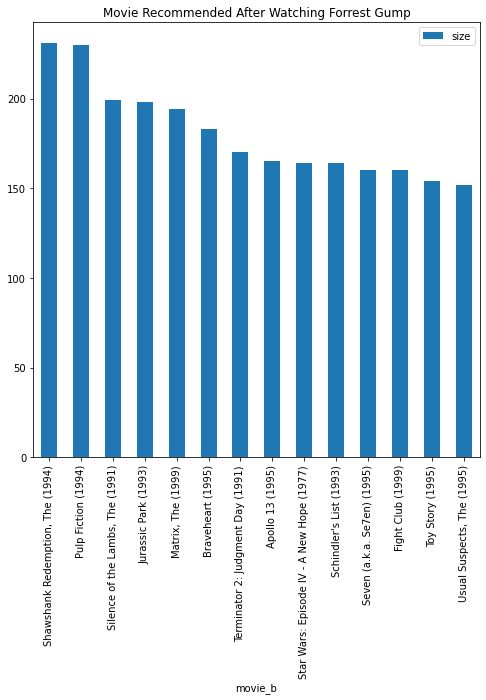

In [27]:
import matplotlib.pyplot as plt
__.plot.bar(x='movie_b', 
            title='Movie Recommended After Watching Forrest Gump',
            figsize=(8,8))
plt.show()